# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## MNIST 

MNIST jest dużym zbiorem ręcznie pisanych cyfr.

https://en.wikipedia.org/wiki/MNIST_database


**UWAGA**

We wszystkich ćwiczeniach zmierz czas potrzebny do wykonania funkcji `fit` i `score`. (line magic `%time`) 

Wyciągnij wnioski nt. skuteczności klasyfikatorów o ich wydajnosci obliczeniowej.

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

### Wczytanie danych MNIST

Jest wiele sposobów załadowania danych mnist do pamięci. Możemy skorzystać z funkcji `fetch_openml`.




In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X.dtype,y.shape

In [ ]:
np.prod(X.shape)/1024**2

### Zadanie 1.

Dokonaj podziału danych i etykiet na dwa zbiory - trenujący i testowy o rozmiarach odpowiednio `60000` i `10000`.

In [ ]:
# YOUR CODE HERE
train,test,train_labels,test_labels = train_test_split(X,y,test_size=1/7,random_state = 42)
train = np.float32(train)
print(train[123].dtype)
# raise NotImplementedError()


In [ ]:
assert train.shape == (60000, 784)
assert test.shape == (10000, 784)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)
assert train[123].dtype == np.float32
assert train[123].shape == (784,)

### Zadanie 2.

Wyświetl dla losowego przykładu etykietę oraz cyfrę. Zauważ, że cyfry są obrazkami `28x28`.

In [ ]:
# YOUR CODE HERE
import random
i = random.randint(0,len(test))
plt.imshow(test[i].reshape(28,28))
plt.show()
#raise NotImplementedError()


## MNIST - linear model

Zastosuj `LogisticRegression`:

 - zestaw danych MNIST jest duży dla tej metody i obliczenia mogą trwać długo. 
 - przeskaluj obrazki i wybierz zestaw 

 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# YOUR CODE HERE
scaler = StandardScaler()
scaler.fit(train)
scaled_train,scaled_test = scaler.transform(train),scaler.transform(test)
reduced_train = scaled_train[:1000]
reduced_train_labels = train_labels[:1000]
#raise NotImplementedError()




In [10]:
np.testing.assert_almost_equal( np.mean(scaled_train,axis=0), 0.0,decimal=5)
np.testing.assert_almost_equal( np.std(scaled_train,axis=0)[np.std(scaled_train,axis=0)>0],1.0,decimal=3)
assert reduced_train.shape == (1000,28**2)
assert reduced_train_labels.shape == (1000,)

Trening wykonamy na 1000 pierwszych przykładów:
     
    clf.fit(reduced_scaled_train,reduced_train_labels)
    
 - UWAGA - dla wszystkich przykładów można  zredukować tolerację:  `solver='sag'` i `tol=0.1`
 

In [11]:
# YOUR CODE HERE
clf = LogisticRegression(multi_class='ovr',solver='sag',tol=0.1).fit(reduced_train,reduced_train_labels)

score = clf.score(scaled_test,test_labels)
#raise NotImplementedError()


In [12]:
assert score>0.8

Spróbuj wykonać to samo na obrazkach przeskalowanych z zachowaniem proporcji: 

    scaled_test = test/255
    scaled_train = train/255
    
Czy wynik jest lepszy?    

In [13]:
scaled_test = test/255
scaled_train = train/255

clf = LogisticRegression(multi_class='ovr',solver='sag',tol=0.1).fit(reduced_train,reduced_train_labels)
score = clf.score(scaled_test,test_labels)
print(score)

0.7268


## PCA

Wykonaj redukcję PCA do np. 54 cech na cechach przeskalowanych z zachowaniem proporcji:

    scaled_test = test/255
    scaled_train = train/255
    

Wykorzystaj metodę `.inverse_transform`  by otrzymać rekontrukcję orginałów w orginalnej przetrzeni ($28^2$). Narysuj orginały i rekonstrukcję.

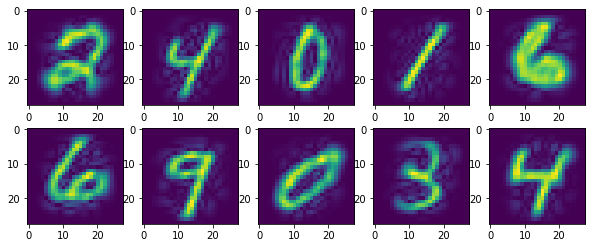

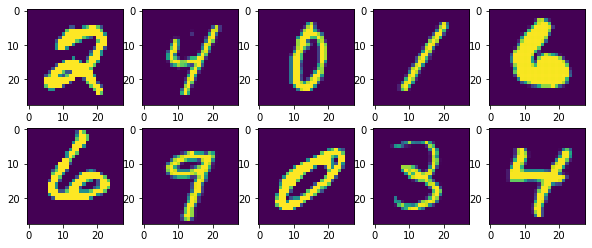

In [14]:
from sklearn.decomposition import PCA

def plot10(x,**args):
    f,ax = plt.subplots(2,5,figsize=(10,4))
    for i,c_ in enumerate(x):
        ax.ravel()[i].imshow( np.abs(c_).reshape(28,28),**args ) 
    plt.show()

# YOUR CODE HERE

pca = PCA(54)
pca.fit(train/255)
train_pca = pca.transform(scaled_train)
test_pca = pca.transform(scaled_test)
x_pca = pca.inverse_transform(train_pca)

plot10(x_pca[:10])
plot10(train[:10])
# raise NotImplementedError()


Wykonaj regresję logistyczną dla 54 wymiarowych danych otrzymanych w poprzednim punkcie:

In [15]:
# YOUR CODE HERE
clf.fit(train_pca, train_labels)
score_pca = clf.score(test_pca, test_labels)
#raise NotImplementedError()

In [16]:
assert score_pca > 0.85

## Perceptron 

In [17]:
from sklearn.linear_model import Perceptron

# YOUR CODE HERE
clf = Perceptron()
clf.fit(train,train_labels)
score_perceptron=clf.score(test,test_labels)
#raise NotImplementedError()

In [18]:
assert score_perceptron > 0.85

## MNIST z klasyfikatorem kNN

Korzystając z pakietu `sklearn` poklasyfikuj dane MNIST.

*UWAGA* -  testowanie klasyfikatora wymaga kilku sekund na 100 przykładów. Dlatego funkcje: `clf.score` i `clf.predict` należy wywoływać na podziorze danych testujących lub liczyć się z długim czasem działania. 

In [19]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(7,n_jobs=2)
clf.fit(train,train_labels)
score_knn = clf.score(test[:1000],test_labels[:1000])

In [20]:
assert score_knn>0.9

### Analiza błędów 

Znajdź przykłady (np. 10 sztuk) dla których klasyfikator się pomylił. Zastanów się czy człowiek też mógłby się pomylić w tych przypadkach.

In [21]:
test_labels[123]

'4'

In [ ]:
# YOUR CODE HERE

# raise NotImplementedError()
np.sum(clf.predict(test) == test_labels),test_labels.shape[0]
np.sum(clf2.predict(test) ==  test_labels),test_labels.shape[0]

for i in range(10):
     Z = clf2.predict(test[i:i+1])
     P = test_labels[i]
     if Z != P:
         print(Z,P)
         plt.imshow(test[i].reshape(8,8))
         plt.show()

##  MNIST z klasyfikatorem SVM

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `sklearn` 

 - należy zastosować skalowanie danych (np. `preprocessing.StandardScaler`)
 - warto zacząć eksperymenty od `1000` przykładów trenujących. Trenowanie SVM jest wolne.

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn import svm
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train[:1000],train_labels[:1000])
clf = svm.SVC(decision_function_shape ='ovo',kernel='rbf')
clf.fit(scaler.transform(train[:1000]),train_labels[:1000])
clf.score(scaler.transform(test),test_labels)

##  MNIST z klasyfikatorem SVM w zredukowanej przestrzeni danych (PCA)

Wykonaj redukcję danych z pomocą PCA, np.:

    pca = decomposition.PCA(n_components=35, whiten=True,\
                            svd_solver='randomized')
                            
                            
                            
 - Zmniejszając wymiar przestrzeni można pokusić się o zwiększenie zbioru trenującego.
 - Przeczytaj co oznacza `whiten`.

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn import decomposition 
pca = decomposition.PCA(n_components=50, whiten=True,svd_solver='randomized')
pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

clf.fit(train_pca,train_labels)
svm_score = clf.score(test_pca,test_labels)
print(svm_score)

In [ ]:
assert svm_score > 0.97